# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#F20574", "#020873", "#F29F05"] # Outras cores: #04D9D9 e #05F29B
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [2]:
df = sns.load_dataset('tips')
df.to_csv('../data/raw/tips.csv', index = False)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

![Tips com IA](https://i.ibb.co/9q4XPPv/tips-ia.webp)

O dataset "tips" é um conjunto de dados disponível na biblioteca Seaborn, que é frequentemente usado para análise exploratória de dados e para demonstrações em visualização de dados e modelagem estatística. Ele contém informações sobre **gorjetas recebidas por garçons em um restaurante durante um determinado período**.

Ele é amplamente utilizado na comunidade de ciência de dados e estatística, mas sua origem específica não é amplamente documentada nas fontes comuns de informação sobre datasets. Ele parece ter sido criado especificamente para fins educacionais, provavelmente derivado de dados coletados ou simulados para ilustração.

Esse dataset inclui variáveis como o total da conta, a gorjeta dada, etc. A variável dependente geralmente é a ``tip``, com as outras variáveis sendo usadas como preditoras.

### 2.1. Dicionário de dados

In [3]:
# Criando um dicionário para o dataset tips
dicionario_tips = {
    'variavel': ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'],
    'descricao': [
        'Total da conta em dólares',
        'Valor da gorjeta em dólares',
        'Sexo do pagante da conta',
        'Indica se o grupo incluía fumantes',
        'Dia da semana',
        'Refeição (Almoço ou Jantar)',
        'Tamanho do grupo'
    ],
    'tipo': ['Quantitativa', 'Quantitativa', 'Qualitativa', 'Qualitativa', 'Qualitativa', 'Qualitativa', 'Quantitativa'],
    'subtipo': ['Contínua', 'Contínua', 'Nominal', 'Nominal', 'Ordinal', 'Nominal', 'Discreta']
}

# Convertendo o dicionário para um DataFrame para melhorar a visualização
df_dicionario_tips = pd.DataFrame(dicionario_tips)
df_dicionario_tips

,variavel,descricao,tipo,subtipo
0,total_bill,Total da conta em dólares,Quantitativa,Contínua
1,tip,Valor da gorjeta em dólares,Quantitativa,Contínua
2,sex,Sexo do pagante da conta,Qualitativa,Nominal
3,smoker,Indica se o grupo incluía fumantes,Qualitativa,Nominal
4,day,Dia da semana,Qualitativa,Ordinal
5,time,Refeição (Almoço ou Jantar),Qualitativa,Nominal
6,size,Tamanho do grupo,Quantitativa,Discreta


O dataset possui **7 variáveis**, sendo:
- 3 qualitativas nominais;
- 1 qualitativa ordinal;
- 2 quantitativas contínuas;
- 1 quantitativa discreta.

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Qual é a relação entre o valor total da conta e o valor da gorjeta?

### 3.1. Existem dados faltantes, se sim quantos e em quais variáveis?

In [4]:
# Verificando a quantidade de dados faltantes em cada coluna (variável)
dados_faltantes = df.isnull().sum()

dados_faltantes

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- Pela saída acima, nenhuma das colunas (variáveis) tem dados faltantes.

In [5]:
# Verificando se há linhas inteiras com dados faltantes
serie_linhas_faltantes = df.isnull().all(axis=1)

# Quantidade de linhas inteiras faltantes
qtd_linhas_faltantes = serie_linhas_faltantes.sum()
    
print(f"O número de linhas inteiras faltantes é: {qtd_linhas_faltantes}.")

O número de linhas inteiras faltantes é: 0.


- Já era de se esperar que também não haveria linhas inteiras faltantes já que não há dados faltantes.

### 3.2. Qual a distribuição dos dados (variável por variável)?

In [6]:
# Visualizando as estatísticas das colunas
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


----------------------------------------------------------------------------------------------

In [7]:
# Investigando quais são os 4 dias da semana da coluna "day"
dias_unicos = df.day.unique()
dias_unicos

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [8]:
# Explorando quais os 2 dias da semana com mais observações
df_day = df.day.value_counts().sort_values(ascending=False)
df_day[:2]

Sat    87
Sun    76
Name: day, dtype: int64

In [9]:
# Criando uma cópia do dataframe para investigar melhor as frequências do "tamanho" das meses
df_copy = df.copy()

# Transformando o tipo da coluna size para string
df_copy['size'] = df_copy['size'].astype(str)

# Contando as frequências dos tamanhos de mesa (que vai de 1 a 6)
contar_valores_size = df_copy['size'].value_counts().sort_values(ascending=False)
contar_valores_size.iloc[:1]

2    156
Name: size, dtype: int64

- O valor médio da conta (**total_bill**) é de aproximadamente ``$19.79``, variando de um mínimo de ``$3.07`` a um máximo de ``$50.81``;
- As gorjetas (**tip**) têm uma média de ``$2.99``, aproximadamente, com valores variando entre ``$1`` e ``$10``;
- Há uma predominância de garçons do gênero (**sex**) masculino sobre o feminino. Há ``157`` homens como garçom;
- No quesito fumantes versus não fumantes (**smoker**), há uma maioria daqueles que não fumam: ``151``;
- O dia (**day**) com maior movimento é o *sábado*, com ``87`` linhas, seguido pelo *domingo*;
- O período (**time**) mais comum para as refeições é o *jantar (Dinner)*, que é mais frequente do que o *almoço (Lunch)* com ``176`` observações;
- Por fim, a média da quantidade de pessoas (**size**) é de ``2.6`` pessoas por mesa, sendo ``2`` pessoas a quantidade mais comum, com ``156`` aparições.

---------

#### 3.2.1. Distribuição das variáveis qualitativas

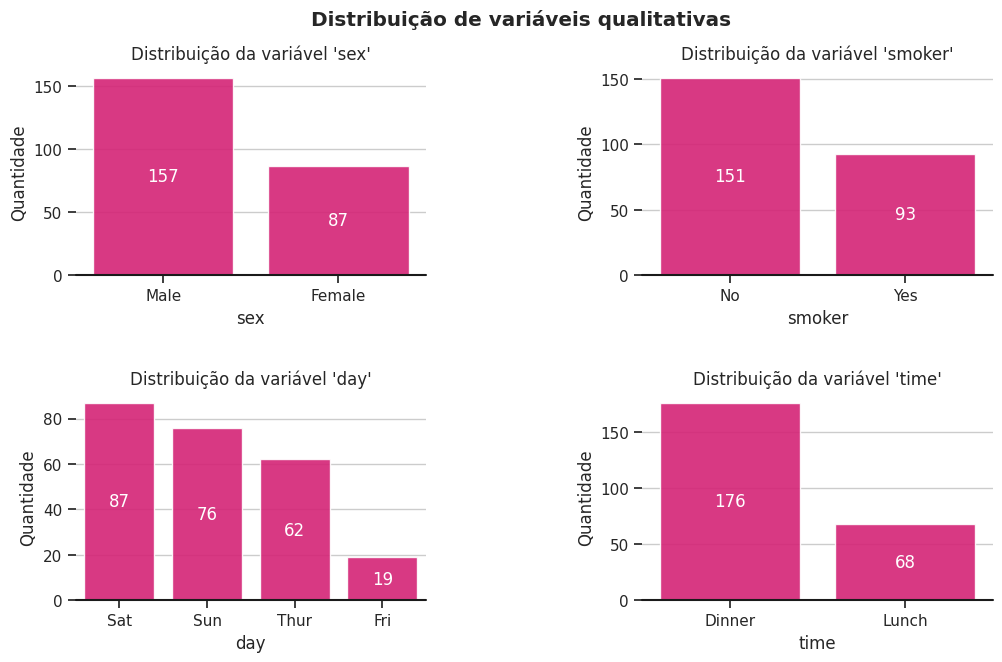

In [10]:
# Criando uma figura e um conjunto de subplots com 2 linhas e 2 colunas, com um tamanho específico de figura
fig, axes = plt.subplots(2, 2, figsize=(11,7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='semibold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'Qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    
plt.show()

-----------

A partir dos gráficos acima podemos notar que:
- Há quase o ``dobro`` de homens garçons se comparado a mulheres;
- A quantidade de não fumantes é predominante, como visto antes, ``61.88%``;
- O dia menos "movimentado" é ``sexta-feira``;
- E a quantidade de observações em termos de **Dinner** (jantar) é quase ``3x`` a de **Lunch** (almoço).

#### 3.2.2. Distribuição das variáveis quantitativas

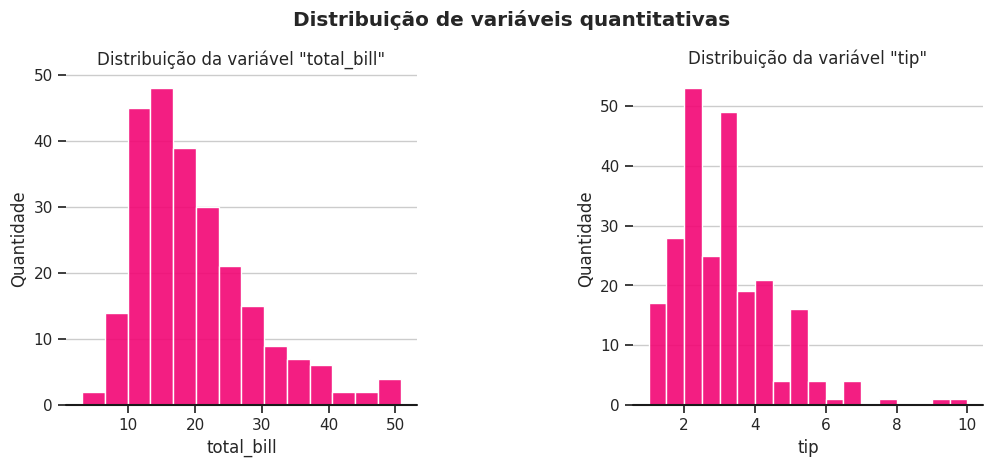

In [11]:
# Primeiro gráfico - Histogramas para variáveis quantitativas, excluindo 'size'
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='semibold')
for i, variavel in enumerate(df_dicionario_tips.query('tipo == "Quantitativa" and variavel != "size"').variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color='k', clip_on=False)
    ax.set_title(f'Distribuição da variável "{variavel}"')
    ax.set_xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

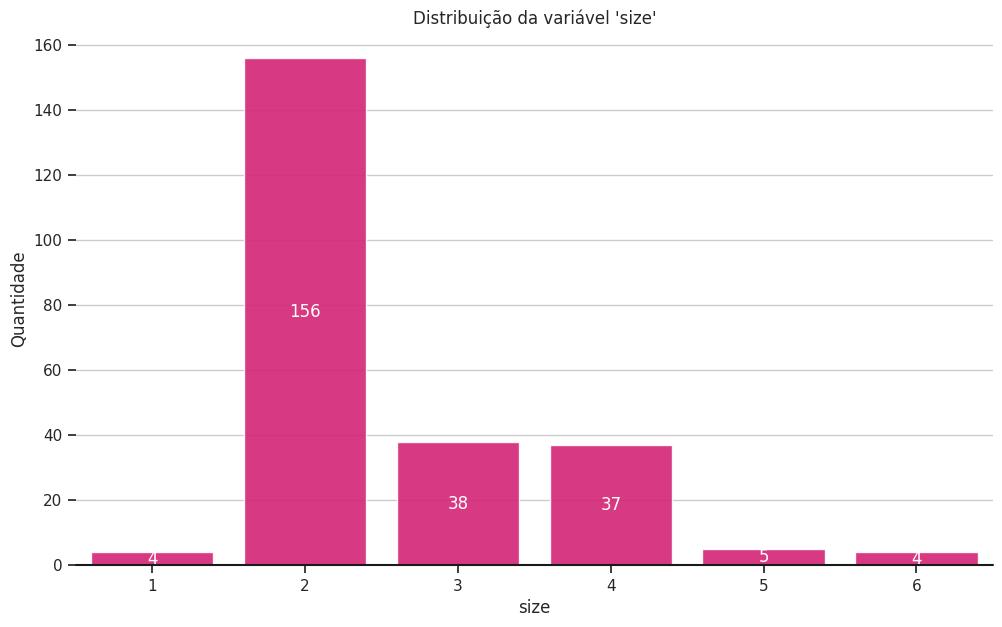

In [12]:
# Segundo gráfico - Contagem para a variável 'size'
fig, ax = plt.subplots(figsize=(11, 7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
for variavel in df_dicionario_tips.query("variavel == 'size'").variavel.to_list():
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=ax,
        color=colors[0],
        alpha=0.9,
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type= 'center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

A partir dos gráficos acima podemos notar que:
- A variável ``total bill`` se asemelha a uma distribuição assimétrica à direta com uma grande concentração de valores entre ``$10`` e ``$20``;
- Assim como a variável anterior, ``tip`` tem uma distribuição assimétrica à direita e grande concentração de valores entre ``$2`` e ``$3``;
- Por fim, o tamanho de mesas, ``size``, com ``2 pessoas`` quase o dobro se comparada aos outros 5 tamanhos somados.

### 3.3. Qual é a relação entre os dias da semana, o sexo do garçom com as variáveis total_bill e tip?

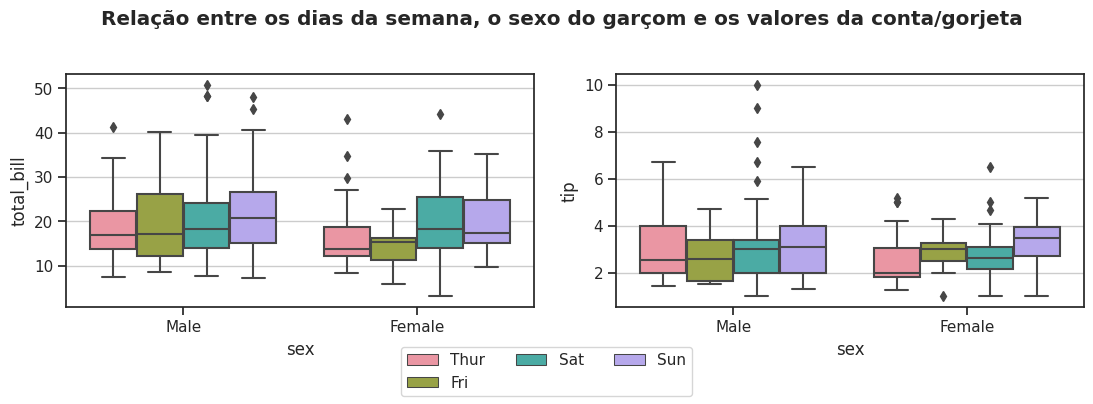

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, o sexo do garçom e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'Quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

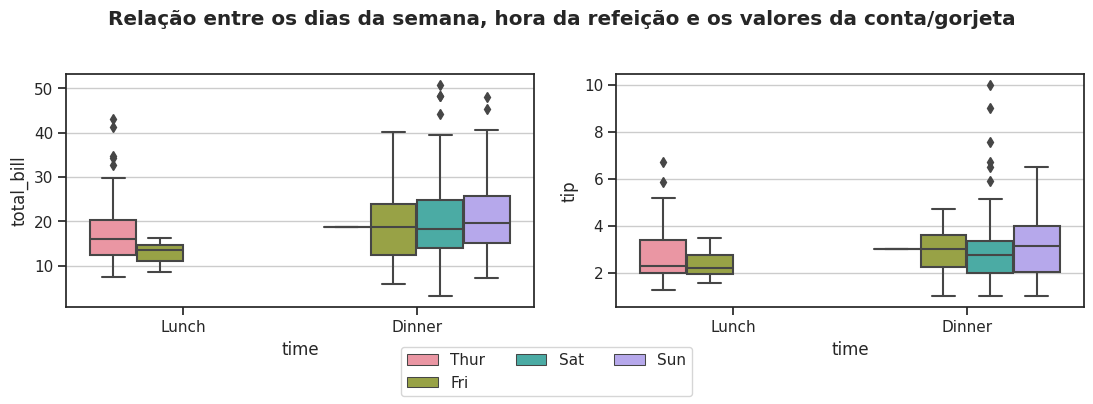

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, hora da refeição e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'Quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, fumantes (ou não) e os valores da conta/gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'Quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="smoker", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

In [33]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


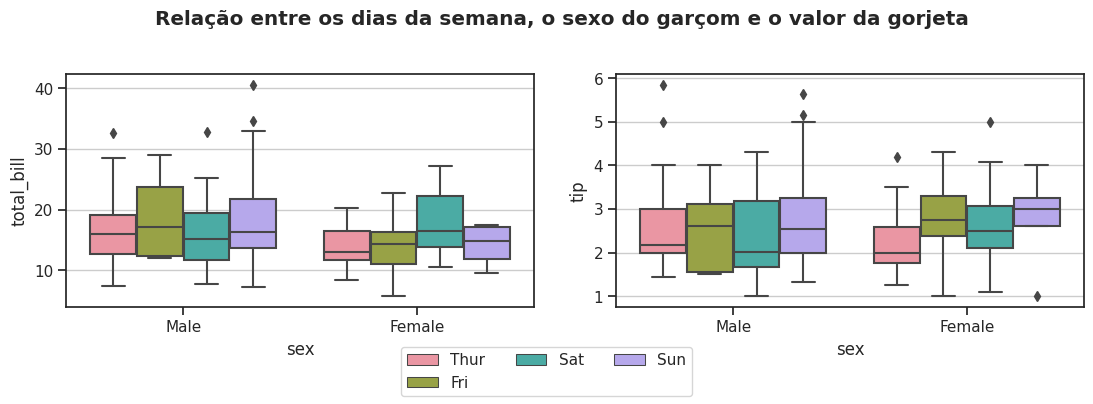

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre os dias da semana, o sexo do garçom e o valor da gorjeta', fontweight='bold')
for i, variavel in enumerate(df_dicionario_tips.query("tipo == 'Quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="day", 
        data=df.query('size == 2'), 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

In [14]:
df.corr()

/tmp/ipykernel_2024/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## 4. Insights